# Load libraries

In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from keras import backend as K

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

# Load dataset

RUN ONLY ONCE FOR THE FIRST TIME

In [ ]:
# zip_path = tf.keras.utils.get_file(
#     origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
#     fname='jena_climate_2009_2016.csv.zip',
#     extract=True)
# csv_path, _ = os.path.splitext(zip_path)

# df = pd.read_csv(csv_path)
# # Slice [start:stop:step], starting from index 5 take every 6th record.
# df = df[5::6]

# # Conver Date time to DateTime index
# date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')
# df.index = date_time

# # Save to Excel file
# df.to_excel('./data/jena_climate_2009_2016.xlsx', engine='openpyxl')

RUN AFTER FIRST TIME

In [32]:
df = pd.read_excel('../../data/jena_climate_2009_2016.xlsx', index_col='Date Time')
date_time = pd.to_datetime(df.index, format='%d.%m.%Y %H:%M:%S')
df.index = date_time

In [33]:
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


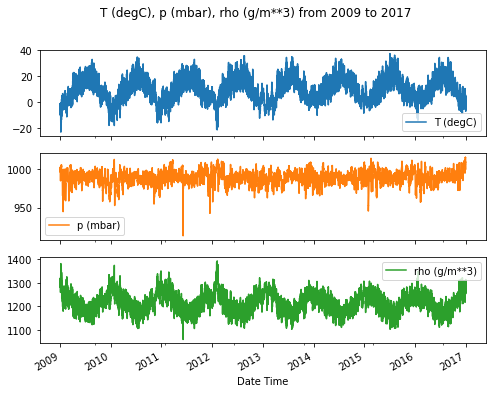

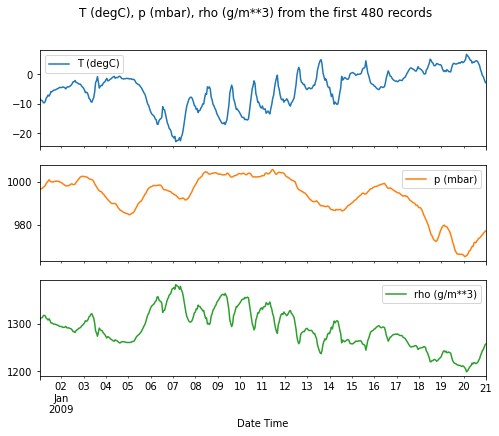

In [34]:
plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True, title='T (degC), p (mbar), rho (g/m**3) from 2009 to 2017')

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True, title='T (degC), p (mbar), rho (g/m**3) from the first 480 records')

In [35]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T (degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot (K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew (degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh (%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax (mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact (mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef (mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh (g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


# Data cleaning

**Temperature classification**

In [48]:
temp = df['T (degC)'].copy()
high_temp = temp >= temp.mean()
low_temp = temp < temp.mean()

temp[high_temp] = 1
temp[low_temp] = 0
# df['T (degC) classification'] = temp

**Wind velocity**

Convert minimum value from `-9999` to `0`.

In [36]:
wv = df['wv (m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0

max_wv = df['max. wv (m/s)']
bad_max_wv = max_wv == -9999.0
max_wv[bad_max_wv] = 0.0

# The above inplace edits are reflected in the DataFrame.
df['wv (m/s)'].min()

0.0

**Wind**

Convert **wind direction** & **wind velocity** to **wind vector**.

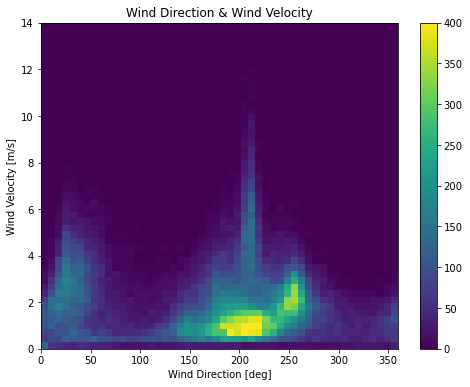

In [37]:
plt.hist2d(df['wd (deg)'], df['wv (m/s)'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')
plt.title('Wind Direction & Wind Velocity')
plt.show()

In [38]:
wv = df.pop('wv (m/s)')
max_wv = df.pop('max. wv (m/s)')

# Convert to radians.
wd_rad = df.pop('wd (deg)')*np.pi / 180

# Calculate the wind x and y components.
df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

# Calculate the max wind x and y components.
df['max Wx'] = max_wv*np.cos(wd_rad)
df['max Wy'] = max_wv*np.sin(wd_rad)

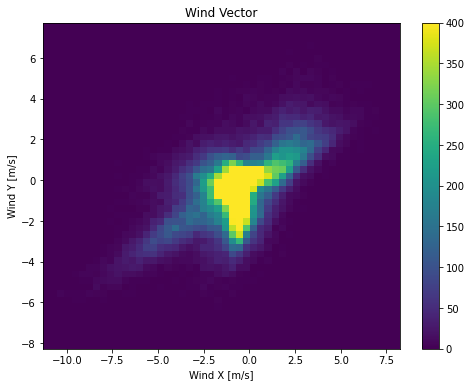

In [39]:
plt.hist2d(df['Wx'], df['Wy'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')
plt.title('Wind Vector')
plt.show()

**Time**

Convert **timestamp** to **time features**

In [40]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

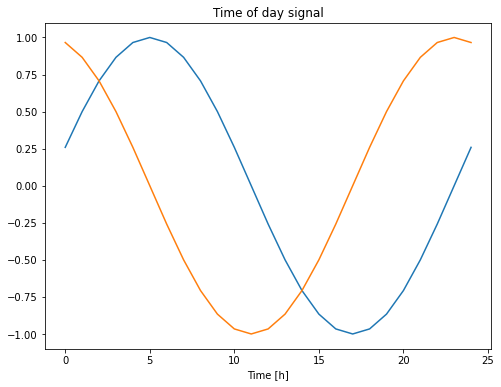

In [41]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')
plt.show()

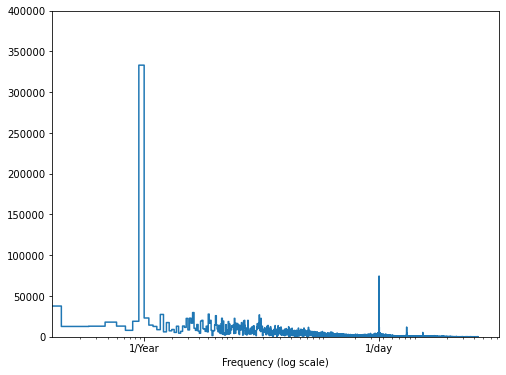

In [42]:
fft = tf.signal.rfft(df['T (degC)'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['T (degC)'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')
plt.show()

# Split dataset

In [128]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

# Normalize dataset

In [129]:
print(df.columns)
TARGET_COLUMN = 'T (degC)'
normalize_features = train_df.loc[:, train_df.columns != TARGET_COLUMN].columns
print(normalize_features)

print(df[[TARGET_COLUMN]].value_counts(normalize=True))

Index(['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)',
       'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'Wx', 'Wy', 'max Wx', 'max Wy',
       'Day sin', 'Day cos', 'Year sin', 'Year cos'],
      dtype='object')
Index(['p (mbar)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)', 'VPmax (mbar)',
       'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)',
       'rho (g/m**3)', 'Wx', 'Wy', 'max Wx', 'max Wy', 'Day sin', 'Day cos',
       'Year sin', 'Year cos'],
      dtype='object')
T (degC)
 14.87      0.000770
 8.86       0.000756
 5.87       0.000742
 4.27       0.000699
 4.97       0.000685
              ...   
-10.63      0.000014
-10.62      0.000014
-10.58      0.000014
-10.56      0.000014
 37.28      0.000014
Length: 4673, dtype: float64


In [130]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = ( (train_df - train_mean) / train_std )
val_df = ( (val_df - train_mean) / train_std )
test_df = ( (test_df - train_mean) / train_std )

In [58]:
train_df['T (degC) classification'] = temp[0:int(n*0.7)]
val_df['T (degC) classification'] = temp[int(n*0.7):int(n*0.9)]
test_df['T (degC) classification'] = temp[int(n*0.9):]

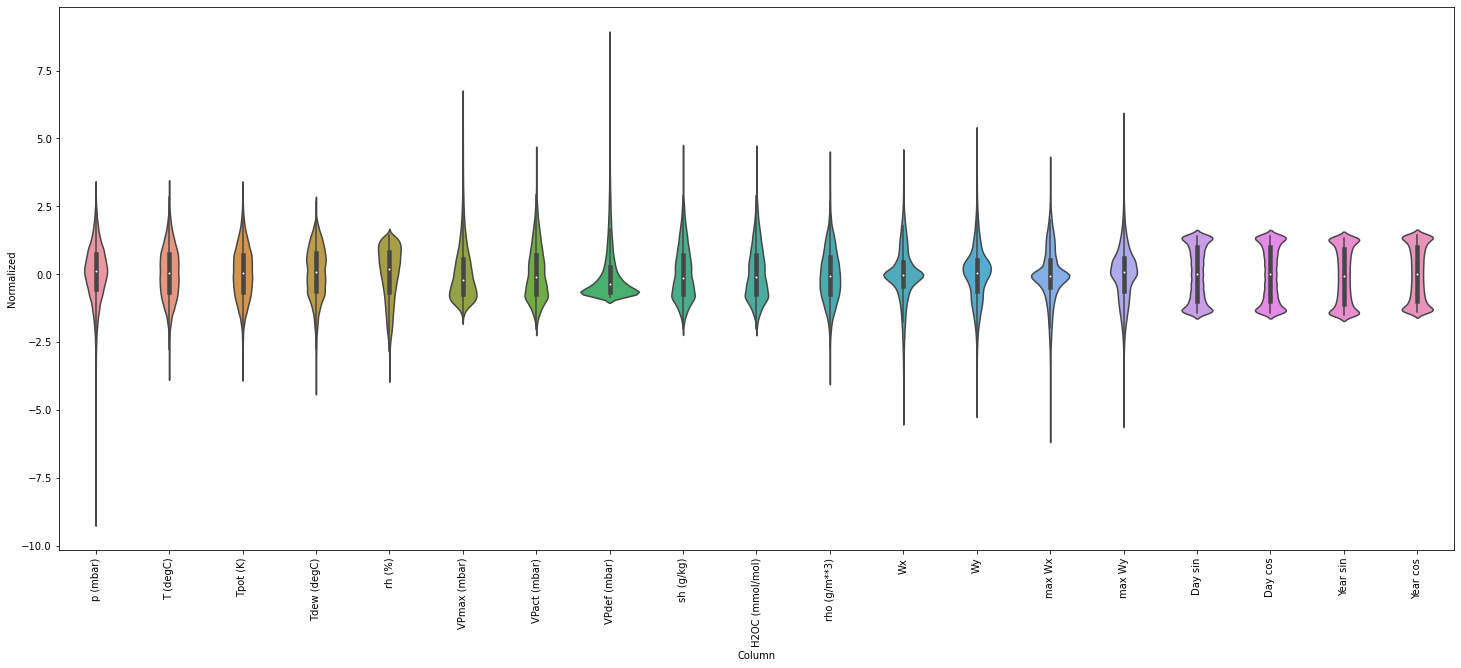

In [59]:
df_std = (df - train_mean) / train_std
# df_std = pd.merge(df_std, df.loc[:, [TARGET_COLUMN]], left_index=True,right_index=True)
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(25, 10))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

# WindowGenerator

In [60]:
BATCH_SIZE = 32

class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df, val_df, test_df,
               label_columns=None, batch_size=1):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df
    self.batch_size = batch_size

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(self.train_df.columns)}
    
    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels
  
  def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
      plt.subplot(max_n, 1, n+1)
      plt.ylabel(f'{plot_col} [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [h]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        seed=4,
        buffer_size=10000,
        batch_size=self.batch_size,)

    ds = ds.map(self.split_window)

    return ds
  
  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)

  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.train))
      # And cache it for next time
      self._example = result
    return result

## Single Step Window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['T (degC)']


2023-02-07 06:44:22.131807: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Inputs shape (batch, time, features): (32, 1, 20)
Labels shape (batch, time, features): (32, 1, 1)


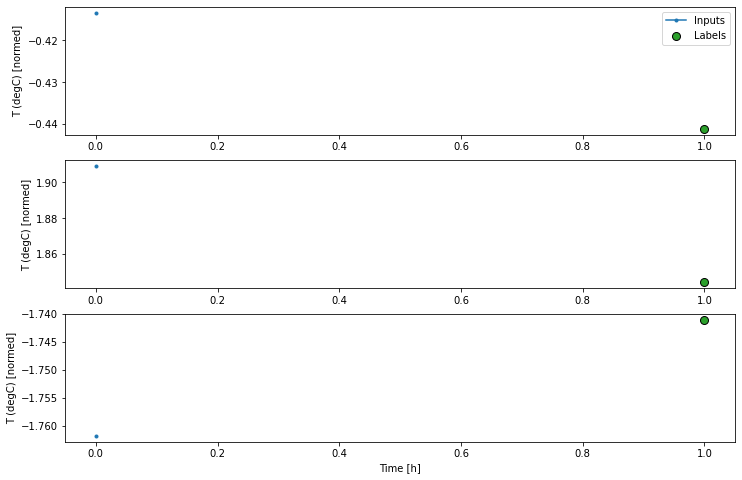

In [61]:
single_step_window = WindowGenerator(
    train_df=train_df, val_df=val_df, test_df=test_df,
    input_width=1, label_width=1, shift=1,
    label_columns=[TARGET_COLUMN], batch_size=BATCH_SIZE)
print(single_step_window)
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')
single_step_window.plot(plot_col=TARGET_COLUMN)

## Wide Window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['T (degC)']
Inputs shape (batch, time, features): (32, 24, 20)
Labels shape (batch, time, features): (32, 24, 1)


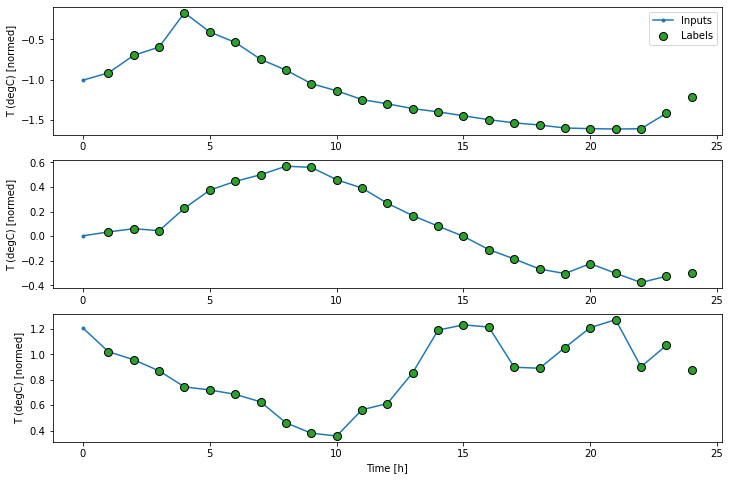

In [62]:
wide_window = WindowGenerator(
    train_df=train_df, val_df=val_df, test_df=test_df,
    input_width=24, label_width=24, shift=1,
    label_columns=[TARGET_COLUMN], batch_size=BATCH_SIZE)
print(wide_window)
for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')
wide_window.plot(plot_col=TARGET_COLUMN)

## Convolutional Window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24]
Label column name(s): ['T (degC)']


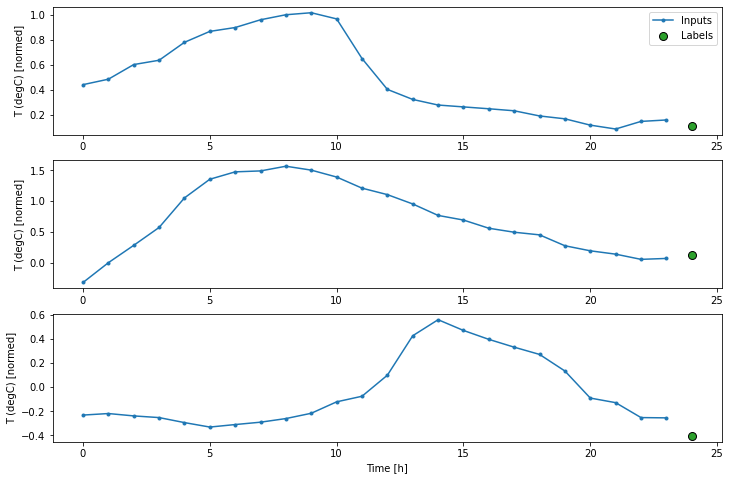

In [63]:
CONV_WIDTH = 4 * 6 # 24 hours
conv_window = WindowGenerator(
    train_df=train_df, val_df=val_df, test_df=test_df,
    input_width=CONV_WIDTH, label_width=1, shift=1,
    label_columns=[TARGET_COLUMN], batch_size=BATCH_SIZE)
print(conv_window)
conv_window.plot(plot_col=TARGET_COLUMN)

## Wide Convolutional Window

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): ['T (degC)']


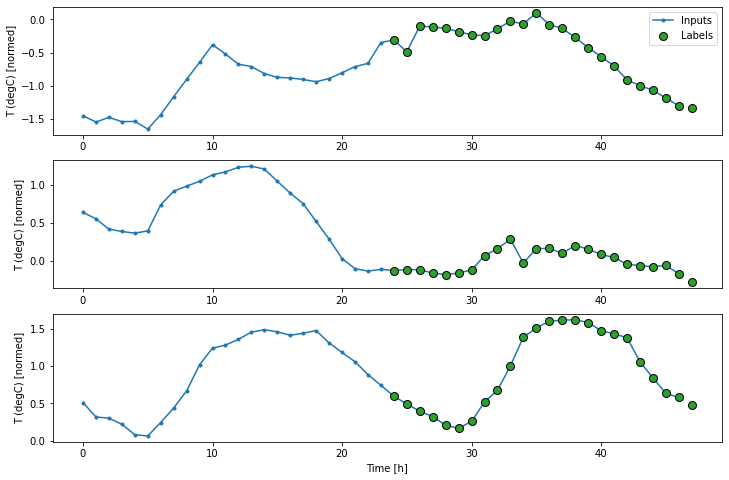

In [64]:
LABEL_WIDTH = CONV_WIDTH
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    train_df=train_df, val_df=val_df, test_df=test_df,
    input_width=INPUT_WIDTH, label_width=LABEL_WIDTH, shift=1,
    label_columns=[TARGET_COLUMN], batch_size=BATCH_SIZE)
print(wide_conv_window)
wide_conv_window.plot(plot_col=TARGET_COLUMN)

# Model Training

In [65]:
MAX_EPOCHS = 20
LEARNING_RATE = 1e-3
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
      tf.keras.metrics.AUC(name='prc', curve='PR')] # precision-recall curve]


def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])
#   model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
#                 optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
#                 metrics=METRICS)

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [66]:
val_performance = {}
performance = {}

## Baseline

In [67]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [70]:
K.clear_session()
baseline = Baseline(label_index=column_indices[TARGET_COLUMN])
history = compile_and_fit(baseline, single_step_window)

Epoch 1/20
1534/1534 [==============================] - 5s 3ms/step - loss: 0.0140 - mean_absolute_error: 0.0829 - val_loss: 0.0128 - val_mean_absolute_error: 0.0785
Epoch 2/20
1534/1534 [==============================] - 5s 3ms/step - loss: 0.0140 - mean_absolute_error: 0.0829 - val_loss: 0.0128 - val_mean_absolute_error: 0.0785
Epoch 3/20
1534/1534 [==============================] - 4s 3ms/step - loss: 0.0140 - mean_absolute_error: 0.0829 - val_loss: 0.0128 - val_mean_absolute_error: 0.0785


In [71]:
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)
for name, value in zip(baseline.metrics_names, performance['Baseline']):
  print(name, ': ', value)

439/439 [==============================] - 1s 2ms/step - loss: 0.0128 - mean_absolute_error: 0.0785
loss :  0.014162614941596985
mean_absolute_error :  0.08516013622283936


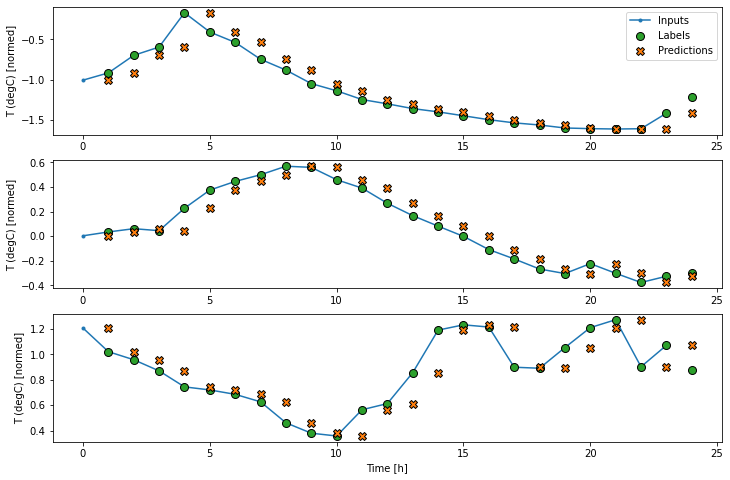

In [72]:
wide_window.plot(model=baseline)

## Linear

In [73]:
K.clear_session()
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])
history = compile_and_fit(linear, single_step_window)

Epoch 1/20
1534/1534 [==============================] - 5s 3ms/step - loss: 0.1965 - mean_absolute_error: 0.2489 - val_loss: 0.0111 - val_mean_absolute_error: 0.0790
Epoch 2/20
1534/1534 [==============================] - 5s 3ms/step - loss: 0.0102 - mean_absolute_error: 0.0749 - val_loss: 0.0093 - val_mean_absolute_error: 0.0714
Epoch 3/20
1534/1534 [==============================] - 4s 2ms/step - loss: 0.0096 - mean_absolute_error: 0.0720 - val_loss: 0.0090 - val_mean_absolute_error: 0.0701
Epoch 4/20
1534/1534 [==============================] - 4s 3ms/step - loss: 0.0093 - mean_absolute_error: 0.0710 - val_loss: 0.0088 - val_mean_absolute_error: 0.0690
Epoch 5/20
1534/1534 [==============================] - 4s 3ms/step - loss: 0.0092 - mean_absolute_error: 0.0703 - val_loss: 0.0087 - val_mean_absolute_error: 0.0688
Epoch 6/20
1534/1534 [==============================] - 5s 3ms/step - loss: 0.0091 - mean_absolute_error: 0.0700 - val_loss: 0.0089 - val_mean_absolute_error: 0.0692
Epoc

In [74]:
val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)
for name, value in zip(linear.metrics_names, performance['Linear']):
  print(name, ': ', value)

439/439 [==============================] - 2s 3ms/step - loss: 0.0087 - mean_absolute_error: 0.0689
loss :  0.008495692163705826
mean_absolute_error :  0.06727075576782227


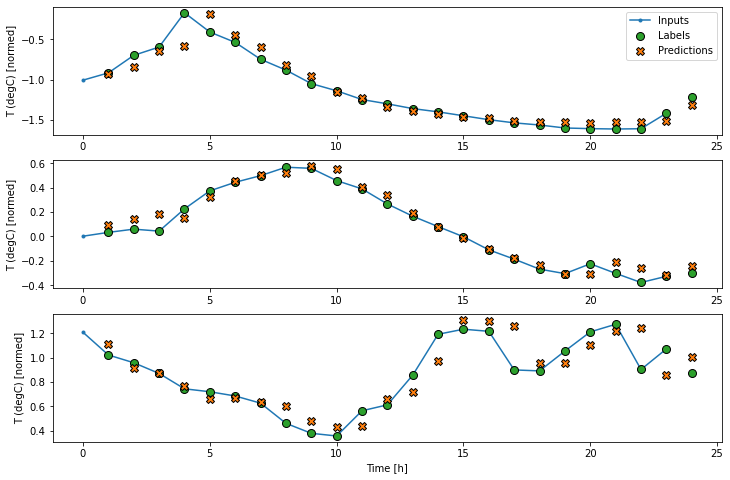

In [75]:
wide_window.plot(model=linear)

## Dense

In [76]:
K.clear_session()
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)

])
history = compile_and_fit(dense, single_step_window)

Epoch 1/20
1534/1534 [==============================] - 8s 4ms/step - loss: 0.0141 - mean_absolute_error: 0.0780 - val_loss: 0.0079 - val_mean_absolute_error: 0.0658
Epoch 2/20
1534/1534 [==============================] - 7s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0648 - val_loss: 0.0077 - val_mean_absolute_error: 0.0645
Epoch 3/20
1534/1534 [==============================] - 8s 5ms/step - loss: 0.0075 - mean_absolute_error: 0.0626 - val_loss: 0.0077 - val_mean_absolute_error: 0.0619
Epoch 4/20
1534/1534 [==============================] - 5s 3ms/step - loss: 0.0072 - mean_absolute_error: 0.0608 - val_loss: 0.0069 - val_mean_absolute_error: 0.0603
Epoch 5/20
1534/1534 [==============================] - 6s 4ms/step - loss: 0.0070 - mean_absolute_error: 0.0599 - val_loss: 0.0067 - val_mean_absolute_error: 0.0572
Epoch 6/20
1534/1534 [==============================] - 5s 4ms/step - loss: 0.0069 - mean_absolute_error: 0.0592 - val_loss: 0.0068 - val_mean_absolute_error: 0.0583
Epoc

In [77]:
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)
for name, value in zip(dense.metrics_names, performance['Dense']):
  print(name, ': ', value)

439/439 [==============================] - 1s 2ms/step - loss: 0.0072 - mean_absolute_error: 0.0622
loss :  0.0076777152717113495
mean_absolute_error :  0.06584729999303818


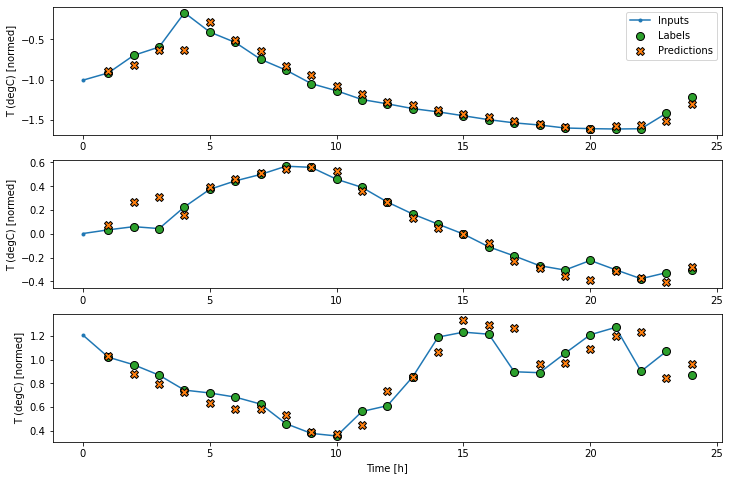

In [78]:
wide_window.plot(model=dense)

## Multi-step Dense

In [85]:
K.clear_session()
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])
history = compile_and_fit(multi_step_dense, conv_window)

Epoch 1/20
1533/1533 [==============================] - 9s 5ms/step - loss: 0.0251 - mean_absolute_error: 0.1142 - val_loss: 0.0106 - val_mean_absolute_error: 0.0779
Epoch 2/20
1533/1533 [==============================] - 7s 5ms/step - loss: 0.0108 - mean_absolute_error: 0.0777 - val_loss: 0.0082 - val_mean_absolute_error: 0.0659
Epoch 3/20
1533/1533 [==============================] - 5s 3ms/step - loss: 0.0097 - mean_absolute_error: 0.0729 - val_loss: 0.0098 - val_mean_absolute_error: 0.0755
Epoch 4/20
1533/1533 [==============================] - 5s 3ms/step - loss: 0.0089 - mean_absolute_error: 0.0694 - val_loss: 0.0083 - val_mean_absolute_error: 0.0660


In [91]:
val_performance['Multi step Dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step Dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)
for name, value in zip(multi_step_dense.metrics_names, performance['Multi step Dense']):
  print(name, ': ', value)

438/438 [==============================] - 1s 2ms/step - loss: 0.0083 - mean_absolute_error: 0.0660
loss :  0.00725936982780695
mean_absolute_error :  0.06189524009823799


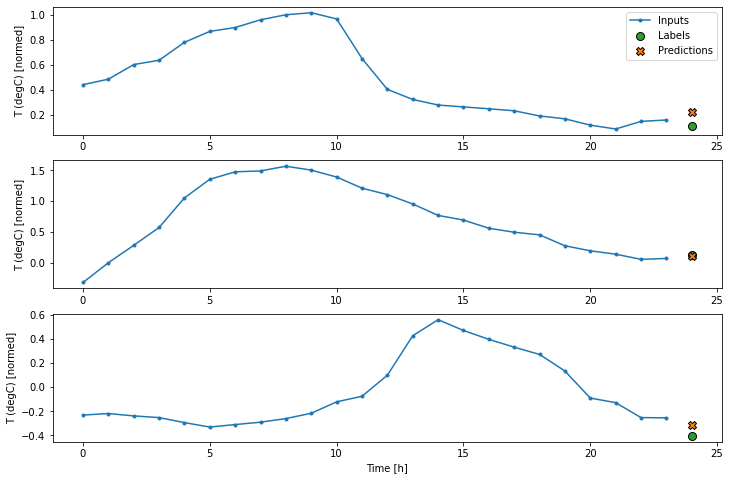

In [87]:
conv_window.plot(model=multi_step_dense)

## CNN

In [102]:
K.clear_session()
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])
history = compile_and_fit(conv_model, conv_window)


Epoch 1/20
1533/1533 [==============================] - 9s 5ms/step - loss: 0.0243 - mean_absolute_error: 0.1095 - val_loss: 0.0115 - val_mean_absolute_error: 0.0796
Epoch 2/20
1533/1533 [==============================] - 6s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0775 - val_loss: 0.0094 - val_mean_absolute_error: 0.0708
Epoch 3/20
1533/1533 [==============================] - 6s 4ms/step - loss: 0.0096 - mean_absolute_error: 0.0722 - val_loss: 0.0087 - val_mean_absolute_error: 0.0680
Epoch 4/20
1533/1533 [==============================] - 6s 4ms/step - loss: 0.0091 - mean_absolute_error: 0.0702 - val_loss: 0.0080 - val_mean_absolute_error: 0.0663
Epoch 5/20
1533/1533 [==============================] - 4s 3ms/step - loss: 0.0085 - mean_absolute_error: 0.0676 - val_loss: 0.0085 - val_mean_absolute_error: 0.0675
Epoch 6/20
1533/1533 [==============================] - 5s 3ms/step - loss: 0.0084 - mean_absolute_error: 0.0669 - val_loss: 0.0070 - val_mean_absolute_error: 0.0589
Epoc

In [103]:
val_performance['CNN'] = conv_model.evaluate(conv_window.val)
performance['CNN'] = conv_model.evaluate(conv_window.test, verbose=0)
for name, value in zip(conv_model.metrics_names, performance['CNN']):
  print(name, ': ', value)

438/438 [==============================] - 1s 2ms/step - loss: 0.0069 - mean_absolute_error: 0.0583
loss :  0.0067121367901563644
mean_absolute_error :  0.058863695710897446


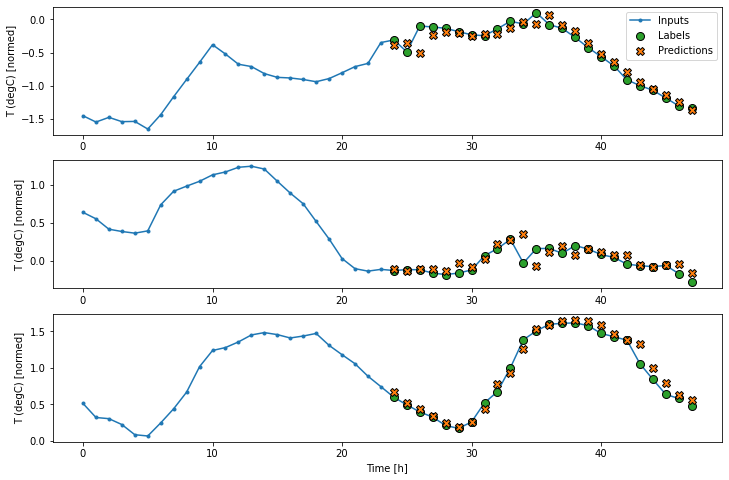

In [104]:
wide_conv_window.plot(model=conv_model)

## LSTM

In [94]:
K.clear_session()
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(64, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(lstm_model, wide_window)


Epoch 1/20
1533/1533 [==============================] - 51s 32ms/step - loss: 0.0191 - mean_absolute_error: 0.0798 - val_loss: 0.0063 - val_mean_absolute_error: 0.0554
Epoch 2/20
1533/1533 [==============================] - 40s 26ms/step - loss: 0.0061 - mean_absolute_error: 0.0545 - val_loss: 0.0058 - val_mean_absolute_error: 0.0527
Epoch 3/20
1533/1533 [==============================] - 39s 26ms/step - loss: 0.0058 - mean_absolute_error: 0.0528 - val_loss: 0.0057 - val_mean_absolute_error: 0.0520
Epoch 4/20
1533/1533 [==============================] - 40s 26ms/step - loss: 0.0056 - mean_absolute_error: 0.0518 - val_loss: 0.0057 - val_mean_absolute_error: 0.0525
Epoch 5/20
1533/1533 [==============================] - 37s 24ms/step - loss: 0.0054 - mean_absolute_error: 0.0512 - val_loss: 0.0057 - val_mean_absolute_error: 0.0523
Epoch 6/20
1533/1533 [==============================] - 37s 24ms/step - loss: 0.0053 - mean_absolute_error: 0.0505 - val_loss: 0.0056 - val_mean_absolute_error:

In [98]:
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)
for name, value in zip(lstm_model.metrics_names, performance['LSTM']):
  print(name, ': ', value)

438/438 [==============================] - 4s 10ms/step - loss: 0.0059 - mean_absolute_error: 0.0532
loss :  0.00595059571787715
mean_absolute_error :  0.0539570115506649


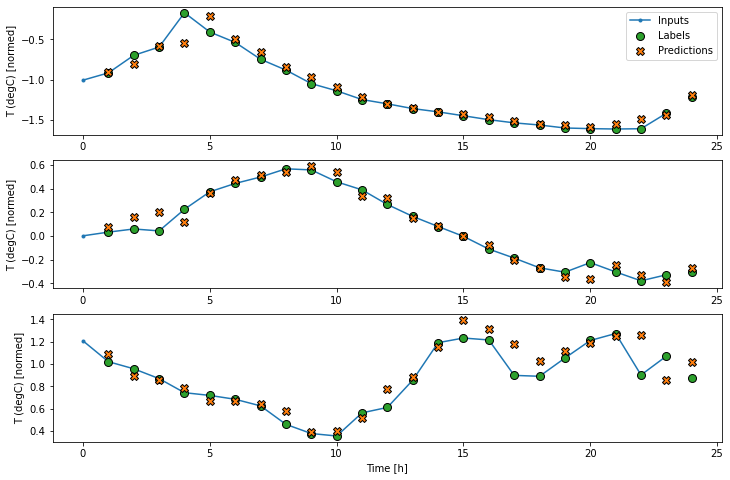

In [99]:
wide_window.plot(model=lstm_model)

## Performance

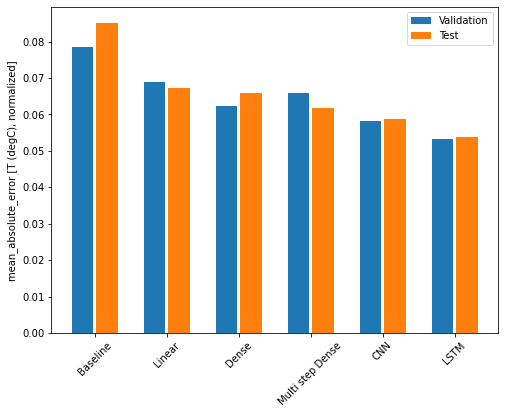

In [105]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [T (degC), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()


## Residual Connections

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): None
Inputs shape (batch, time, features): (32, 24, 19)
Labels shape (batch, time, features): (32, 24, 19)


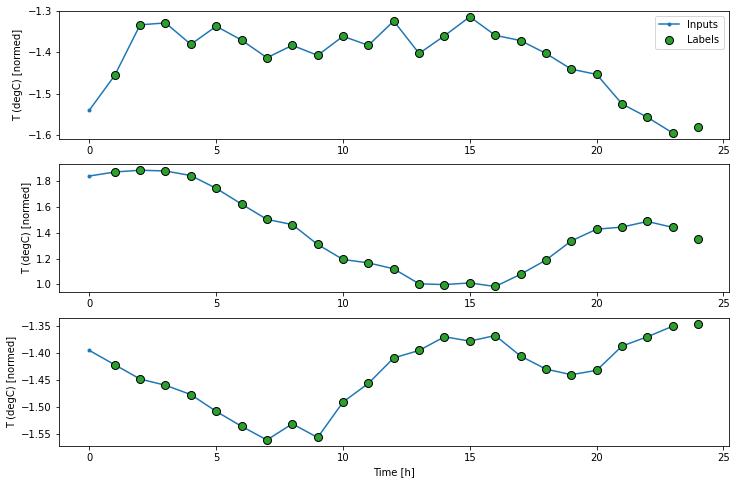

In [131]:
wide_window = WindowGenerator(
    train_df=train_df, val_df=val_df, test_df=test_df,
    input_width=24, label_width=24, shift=1,
    batch_size=BATCH_SIZE)
print(wide_window)
for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')
wide_window.plot(plot_col=TARGET_COLUMN)

In [132]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each time step is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

In [137]:
K.clear_session()
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
        tf.keras.layers.LSTM(64, return_sequences=True),
        tf.keras.layers.Dense(
            units=num_features,
            # The predicted deltas should start small.
            # Therefore, initialize the output layer with zeros.
            kernel_initializer=tf.initializers.zeros())
    ])
)

history = compile_and_fit(residual_lstm, wide_window)

Epoch 1/20
1533/1533 [==============================] - 48s 30ms/step - loss: 0.0642 - mean_absolute_error: 0.1208 - val_loss: 0.0623 - val_mean_absolute_error: 0.1182
Epoch 2/20
1533/1533 [==============================] - 50s 33ms/step - loss: 0.0602 - mean_absolute_error: 0.1164 - val_loss: 0.0620 - val_mean_absolute_error: 0.1178
Epoch 3/20
1533/1533 [==============================] - 42s 27ms/step - loss: 0.0585 - mean_absolute_error: 0.1152 - val_loss: 0.0623 - val_mean_absolute_error: 0.1181
Epoch 4/20
1533/1533 [==============================] - 43s 28ms/step - loss: 0.0571 - mean_absolute_error: 0.1144 - val_loss: 0.0633 - val_mean_absolute_error: 0.1188


In [138]:
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)
for name, value in zip(residual_lstm.metrics_names, performance['Residual LSTM']):
  print(name, ': ', value)

438/438 [==============================] - 5s 11ms/step - loss: 0.0633 - mean_absolute_error: 0.1188
loss :  0.06367700546979904
mean_absolute_error :  0.12012065947055817


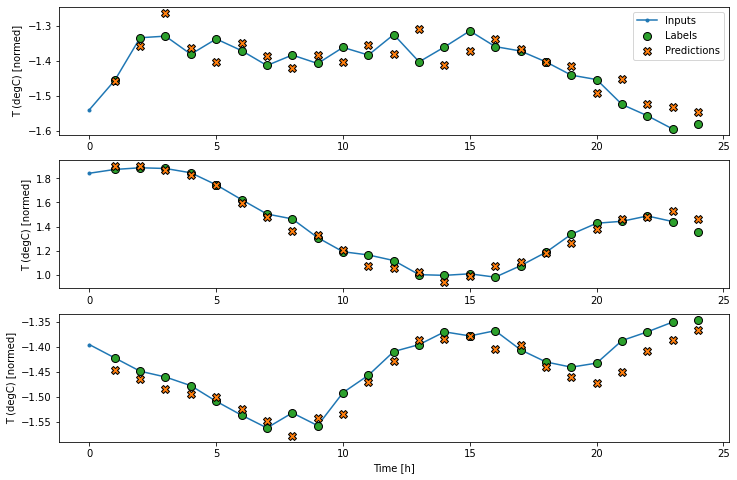

In [139]:
wide_window.plot(model=residual_lstm)

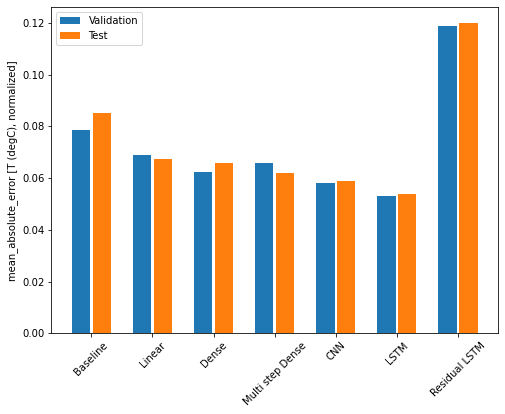

In [140]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [T (degC), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()


# Plot loss

In [ ]:
metrics = ['loss'] #, 'balanced_accuracy', 'auc', 'prc', 'precision', 'recall']
plt.figure(figsize=(25, 10))
for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(3,3,n+1)
    plt.plot(history.epoch, history.history[metric], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric], label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    # # elif metric == 'auc':
    # #   plt.ylim([0.8,1])
    # else:
    #   plt.ylim([0,1])
    plt.legend()
plt.show()

# Predict using Model

In [ ]:
def data_loader(new_df):
    return np.array(new_df, dtype=np.float32)[np.newaxis, ...]
linear.predict(data_loader(train_df.loc[:, train_df.columns != 'T (degC) classification'].head(4))) # [0,:4]

# Export Model

In [ ]:
base_path = "models"
model_version = "2"
model_name = "multi_conv_model"
model_path = os.path.join(base_path, model_name, model_version)
tf.saved_model.save(multi_conv_model, model_path)

In [ ]:
saved_model = tf.saved_model.load(model_path)

In [ ]:
saved_model(data_loader(test_df.iloc[0:36, :]), training=False)[:,:,14]

In [ ]:
saved_model(data_loader(test_df.iloc[0:24, :]).tolist(), training=False)[:,:,14]

In [ ]:
print(data_loader(test_df.iloc[0:36, :]).tolist())

In [ ]:
data_loader(test_df.iloc[0:36, :]).shape